## Welcome to ***Choose Your Perfume*** ! 🌸

Welcome to ***Choose Your perfume***🌸, a python🐍 based interface which does more than just giving great perfume recommendations. Behind this sweet scented facade actually lies detailled chemical🧪 and programming🖥️ work, carefully thought through by the creators of this project. 

The perfume industry is heavily connected to chemistry, between understanding the art of blending scents according to their chemical properties and the ability to synthesis molecules according to growing consumer demand. The exponential development of synthesised molecules started no earlier than the mid 19th century, when the technological advancement, although limited, permitted the synthesis of popular and wildly used scents such as vanillin, coumarin, aliphatic aldehydes and hydroxycitronellal⚗️. Later technological discoveries allowed the synthesis of more complex odors like oakmoss, vetiver and patchouli. Nowadays, our limitations have been significantly decreased and the extent of synthesised aroma is endless, as can be noticed in our ***Choose Your Perfume***🌸 app.

Although detailling the chemical process behind the synthesis of scents and blending of fragrances is not the goal⚽ of our project, we are able to offer the users of our app a chemical insight on their favoured scents by providing the structures of the chosen molecules, and complementing informations on the latter.

Going beyond all that is provided in the ***Choose your perfume***🌸 app interface, functions were created within this project to elaborate the understanding of the chemical aspects of scents.

To fully understand the depth of the chemical🧪 analysis provided with the ***Choose Your Perfume***🌸 project, this Jupyter notebook was created📝!

### 1. Initialization

**About this notebook**: A Jupyter Notebook is a shareable document that combines computer code, plain descriptive language, data, 3D models, graphs and more. It provides a interactive environment where code can be explained and data can be explored and visualised. This particular Jupyter notebook will walk you through the development of our project, with snippets of code to help you understand the functionning of our app, as well as visual tools to illustrate the explanations.

**How to use this notebook**: It's not hard! Just navigate through the different cells, read the explanations provided and run the codes. Explore the different results obtained with diverse entries and experiment with the code!

The first step is to import all the dependencies and functions which will ensure that the code runs well here in this notebook. All that is needed is to run the following cell!

In [32]:
import os
import sys
from IPython.display import display

current_dir = os.getcwd()
project_src = os.path.abspath(os.path.join(current_dir, "..", "src", "chooseyourperfume"))
if project_src not in sys.path:
    sys.path.append(project_src)
#current_dir = os.getcwd()
#target_dir_relative = os.path.join('..', 'src', 'chooseyourperfume')
#target_dir_relative = os.path.join('..', 'data', 'datasets')
#target_dir_absolute = os.path.abspath(os.path.join(current_dir, target_dir_relative))
#sys.path.append(target_dir_absolute)

#from here is chatgpt that suggested but its not necessary
#if target_dir_absolute not in sys.path:
#    sys.path.append(target_dir_absolute)

# Confirm imports work
#try:
#    from logic_cyp import load_data, ask_preferences, score_perfumes
#    from dataset import scent_categories
#    print("✅ Imports successful!")
#except ImportError as e:
#    print(f"⚠️ Import failed: {e}")

***To clarify*** : let's go over each line of this cell:
*import os*: os (operating system) is a standard python module which is essential to import in this notebook. It is necessary for interacting with the operating system, like for example working with the file paths.
*import sys*: sys (system) is also a standard python module which is necessary for this jupyter notebook. It allows the manipulation of the python environment like the import path (sys.path).
*current_dir*: it simply gets the folder where the script is running (the current working directory).
*target_dir_relative*: this line builds a path from the notebook to the target directory, where the main functions will be imported from.
    "..." → goes back one directory, to where all directories containing functions are situated
    "src" and "chooseyourperfume" → they are simply the directories within which the modules containing the functions are.
*target_dir_absolute*: This simply converts the relative path into an absolute one, meaning it rewrites the changed path from the root, to obtain to full path.
*sys.path.append*: allows the importation of modules directly from the chooseyourperfume package inside the src folder even if its not in an installed package, this limits problems within the jupyter notebook while running the codes.

**Let's get started !**

### 2. DATASETS

**2.1 Purpose**

***General note :***
Datasets are essential in the computing world. They are units which collect related sets of information and regroups them to allow their manipulation by the computer. They are often presented in a table, with each column representing a different set of information. Although, as mentionned, they regroup different sets of informations, they often come from a single source and are meant for one project.

***And for the perfume industry? :***
The creation of datasets plays a major role in the evolution of computing skills and technology, and the perfume industry benefits a lot from it. Existing datasets play a critical role in this industry. Even though sensory and particularly olfactory processes are still essential, datasets have helped with the modernizing and enhancing of the procedures of perfume creation in several ways. Firstly, regarding perfume formulation, they allow the analysis of ingredient combination because of the understanding of the structures responsible for a certain scent provided in the datasets. Furthermore, these structures help with predicting how a molecule will smell based on its structure, which is significant for synthetis of scents. Secondly, concerning consumer preference, datasets can identify trends based on scents and build personylised recommendations systems, similar to what is done in this project. Lastly, datatsets are organised units which aid brands for marketing and categorising fragance caracter and their position in the market. Overall, it is safe to say that datasets play an essential role in the development of this project due to its part in the perfume industry.

***Usage in the project :***
Specifically in this project, four datasets were used, each with its own purpose, although some were more useful than others. They are wielded to power the recommendation system as well as the chemical analysis elements of this project. As can be imagined, datasets are the base of this project. 

In [31]:
test_path = os.path.abspath(os.path.join("..", "data", "datasets", "Multi-Labelled_Smiles_Odors_dataset.csv"))

print("Resolved absolute path:", test_path)
print("Exists:", os.path.exists(test_path))

Resolved absolute path: c:\Users\marie\git\chooseyourperfume\data\datasets\Multi-Labelled_Smiles_Odors_dataset.csv
Exists: True


In [36]:
import importlib
import dataset  # This assumes you've already imported it

importlib.reload(dataset)

<module 'dataset' from 'c:\\Users\\marie\\git\\chooseyourperfume\\src\\chooseyourperfume\\dataset.py'>

**Description of the datasets**

- final_perfume_data: this dataset contains a commercial description of the perfumes that are recommanded, including scent description and image. It's purpose in the project is to extract scent-related keywords from its description to match with the users choices inputs which then allows for the scents to be linked to the actually notes via NLP (ask what it means)
- fra_cleaned: it contains a user-readable description of the perfumes, and it is used in this project to add realism and natural language descriptors to the recommandations
- fra_perfumes: this dataset is more structured, and includes information like the image or the brand of the perfumes. It is thanks to this dataset that the recommendations are displayed accompanied by their image.
- multi-labelled_smiles_odors: this dataset is probably the most important chemically, as it includes the SMILEs format of the molecules and their corresponding scents. As can be guessed, it is used here for the structure analysis of the scents.

**2.2 Example usage**

To demonstrate the utility of datasets and how they are structured, please execute the following cell:

In [39]:
try:
    from dataset import (load_csv, load_smiles_odors, load_perfume_descriptions, load_fragrantica_data, load_extended_perfume_set)
    print("✅ Imports successful!")
except ImportError as e:
    print(f"❌ Import failed: {e}")

# 🧪 Helper function to load dataset safely
def try_load(name, loader_func):
    try:
        df = loader_func()
        print(f"✅ Loaded {name} ({len(df)} rows)")
        return df
    except FileNotFoundError as e:
        print(f"⚠️ Could not load {name}: {e}")
        return None

# 🔁 Load each dataset
df_smiles = try_load("Molecule Dataset", load_smiles_odors)
df_desc   = try_load("Perfume Descriptions", load_perfume_descriptions)
df_frag   = try_load("Fragrantica Data", load_fragrantica_data)
df_extended = try_load("Extended Perfume Set", load_extended_perfume_set)

# 📊 Display first few rows of each (if loaded)
if df_smiles is not None:
    display(df_smiles.head(3))

if df_desc is not None and 'Name' in df_desc.columns and 'Description' in df_desc.columns:
    display(df_desc[['Name', 'Description']].head(3))

if df_frag is not None:
    display(df_frag.head(3))

if df_extended is not None and 'Name' in df_extended.columns:
    display(df_extended[['Name', 'Gender', 'Main Accords']].head(3))

✅ Imports successful!
✅ Loaded Molecule Dataset (4983 rows)
✅ Loaded Perfume Descriptions (2191 rows)
✅ Loaded Fragrantica Data (24063 rows)
✅ Loaded Extended Perfume Set (70103 rows)


,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Name,Description
0,Tihota Eau de Parfum,"Rapa Nui for sugar, Tihota is, quite simply, ..."
1,Sola Parfum,A tribute to the expanse of space extending f...
2,Kagiroi Parfum,An aromatic ode to the ancient beauty of Japa...


,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
0,https://www.fragrantica.com/perfume/xerjoff/ac...,accento-overdose-pride-edition,xerjoff,Italy,unisex,"1,42",201,2022.0,"fruity notes, aldehydes, green notes","bulgarian rose, egyptian jasmine, lily-of-the-...","eucalyptus, pine",unknown,NaN,rose,woody,fruity,aromatic,floral
1,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2024,jean-paul-gaultier,France,women,"1,86",70,2024.0,"yuzu, citruses","orange blossom, neroli","musk, blonde woods",unknown,NaN,citrus,white floral,sweet,fresh,musky
2,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2023,jean-paul-gaultier,France,unisex,"1,91",285,2023.0,"blood orange, yuzu","neroli, orange blossom","musk, white woods",natalie gracia-cetto,quentin bisch,citrus,white floral,sweet,fresh spicy,musky


,Name,Gender,Main Accords
0,9am Afnanfor women,for women,"['citrus', 'musky', 'woody', 'aromatic', 'warm..."
1,9am Dive Afnanfor women and men,for women and men,"['fruity', 'woody', 'green', 'warm spicy', 'ar..."
2,9am pour Femme Afnanfor women,for women,"['fruity', 'musky', 'amber', 'citrus', 'powder..."


If the download was successful, the first three lines of the four used datasets should appear in an organised table, according to the informations provided by the unit. Here, it can clearly be seen that the structure of the datasets are what makes them necessary for facilitating the manipulation of its elements. Although only a small fragment of the datasets are represented above, this table conveys ....

**2.3 conclusion**

In the snippet of code shown above, it can be seen that downloading a dataset and making it usable for coding the main functions of the project is not an easy task. It is the base of all the different options included in the interface as well as the chemical study of the scents portrayed in the project. Therefore, a longer code, that is written in the least complex manner is needed to be able to use the datasets according to the wishes of the creators. However hard this may be, it is necessary thanks to its structured supply of information and easy manipulation.

### 3. RECOMMENDATIONS AND CHEMICAL ANALYSIS IN THE INTERFACE

**3.1 Description**

***General note:*** In this section, we will dive deep into the core of the project by studying and explaning the main functions leading to the creation of the interface and the recommendation system, as well as the chemical structures of the scents and how they are presented.

***Chemical link:*** Chemically, the structure of the molecule has a huge impact on its properties. Indeed, even if two molecules contain exactly the same atoms in the same amounts, if their structure differ, they can have completely opposite features. Therefore, to predict the behaviour of certain molecules, it is essential to understand the nature of chemical bonds but also the arragement of the atoms within its structure. Without going in so much detail, here are two simple examples to help clarify the effect of the arrangement of atoms on the properties of a molecule. GO CHATGPT FOR ADDITIONNAL INFO

***Examples:*** These examples involves chiral molecules. A chiral molecule is a molecule which cannot be superposed on its mirror image, like your right and left hands.

- Carvone:
    - This first example is Carvone, commonly found in essential oils. Its (R)-Carvone structure is mostly foound in spearmint oil, thanks to its minty and cool smell.
    - On the other hand, its mirror image (S)-Carvone Caraway seeds, and is defined by its spicy and earthy smell.
- Thalidomide:
    - The first enantiomer, (R)-Thalidomide, is a sedative and helps with morning sickness, one of the syptoms of being pregnant.
    - Its mirror image however, (S)-Thalidomide, is extremely toxic and causes birth defect.

As can be observed, a simple structure difference such as taking the mirror image impacts grandly the effect of the molecule, even though they have the same chemical formulas. It can nevertheless be observed in the examples that the enantiomers are still similar  in certain aspects, such as being related to pregnancy, or being used in essential oils.

***And in the Choose your perfume app?:*** Keeping this example in mind, there are also examples of the same molecule with the same structure being responsible for several scents, which is what can be observed in the chemical analysis included in the interface of the ***Choose Your Perfume*** app.

**3.2 Usage example**

In [42]:
import importlib
import logic_cyp

importlib.reload(logic_cyp)

<module 'logic_cyp' from 'c:\\Users\\marie\\git\\chooseyourperfume\\src\\chooseyourperfume\\logic_cyp.py'>

***Usage example:*** To portray the above confirmation, here is a snippet of code which allows you to choose scents and their weight.

In [51]:
perfume_to_scent_df = load_perfume_descriptions()
perfume_df = load_extended_perfume_set()

perfume_to_scent_df.columns = perfume_to_scent_df.columns.str.strip().str.lower()

from logic_cyp import score_perfumes, enrich_with_scent_columns
from dataset import scent_categories

all_scent_notes = [note for notes in scent_categories.values() for note in notes]

import warnings
from pandas.errors import PerformanceWarning

with warnings.catch_warnings():
    warnings.simplefilter("ignore", PerformanceWarning)
    perfume_to_scent_df = enrich_with_scent_columns(perfume_to_scent_df, all_scent_notes, text_column='description')
# Enrich scent columns
#perfume_to_scent_df = enrich_with_scent_columns(perfume_to_scent_df, all_scent_notes, text_column='description')

#all_scent_notes = [note for notes in scent_categories.values() for note in notes]

# Enrich descriptions with binary scent indicators
#perfume_to_scent_df = enrich_with_scent_columns(perfume_to_scent_df, all_scent_notes, text_column='description')

# Define your selected notes and weights (simulate user input)
selected_scents = ['vanilla', 'rose', 'musk']
weights = {'vanilla': 1.5, 'rose': 1.0, 'musk': 0.7}

import contextlib
import io

# Suppress prints from score_perfumes()
with contextlib.redirect_stdout(io.StringIO()):
    result_df = score_perfumes(selected_scents, perfume_to_scent_df, perfume_df, weights)

# Show only the result
display(result_df[['name', 'brand', 'score', 'description_x']].head(2))

,name,brand,score,description_x
1713,lys 41 eau de parfum,Le Labo,3.2,"A lavish, breathtaking, no-holds-barred big w..."
1234,sublimes essences musc perfume oil,Ex Nihilo,3.2,Les Sublimes Essences: a duo of exquisite per...


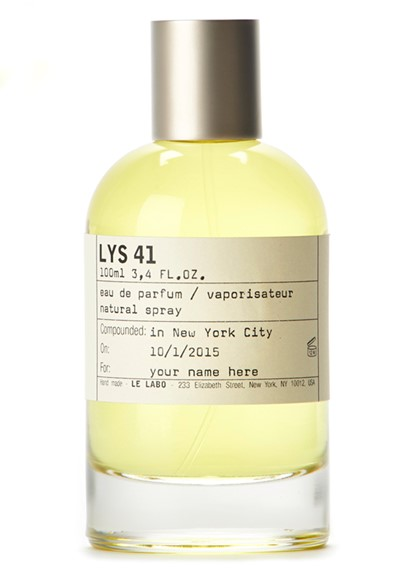

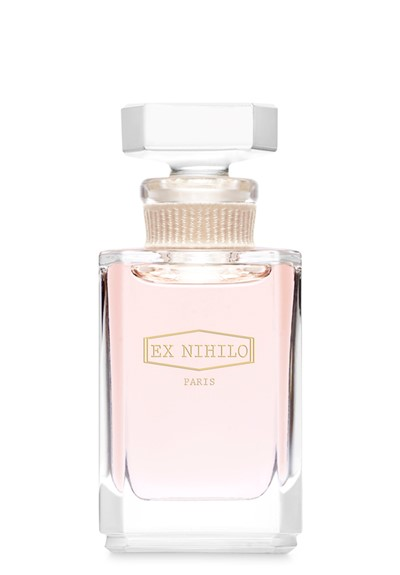

In [54]:
from IPython.display import Image, display
import requests
from io import BytesIO

# Loop over top 2 rows of the result
for _, row in result_df.head(2).iterrows():
    img_url = row.get('image url') or row.get('image_url')
    if isinstance(img_url, str) and img_url.strip():
        response = requests.get(img_url.strip())
        if response.status_code == 200:
            img_bytes = response.content  # Extract raw bytes
            display(Image(data=img_bytes))
        else:
            print(f"⚠️ Image failed to load for {row.get('name')}")
    else:
        print(f"🚫 No image available for {row.get('name')}")


🔬 Molecules for scent: 'vanilla'


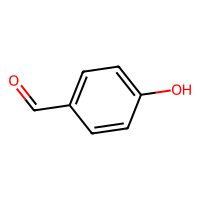

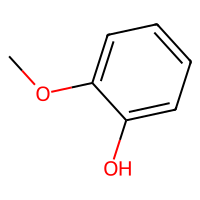

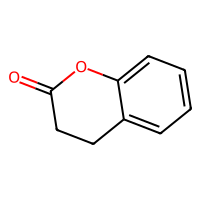


🔬 Molecules for scent: 'rose'


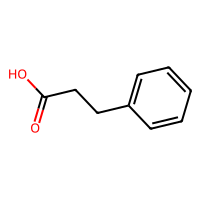

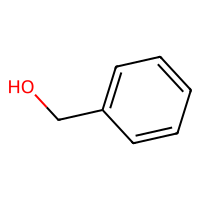

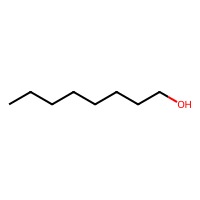


🔬 Molecules for scent: 'musk'


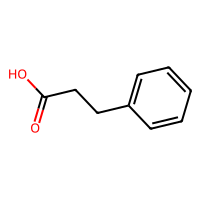

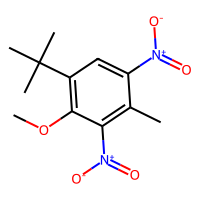

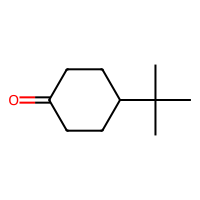

In [56]:
from logic_cyp import get_molecules_for_scents, render_molecule
from dataset import load_smiles_odors
from IPython.display import display

# Load molecule dataset (if not already)
df_smiles = load_smiles_odors()
df_smiles.columns = df_smiles.columns.str.strip().str.lower()

# Get molecules for selected scents
df_mols = get_molecules_for_scents(selected_scents, df_smiles)

# Display up to 3 molecules per scent
for scent in selected_scents:
    print(f"\n🔬 Molecules for scent: '{scent}'")
    try:
        smiles_list = df_mols[df_mols[scent] == 1]['nonstereosmiles'].dropna().unique()[:3]
        if len(smiles_list) == 0:
            print("🚫 No molecules found.")
        else:
            for smi in smiles_list:
                display(render_molecule(smi))
    except Exception as e:
        print(f"⚠️ Error for scent '{scent}': {e}")